In [1]:
# Dependencies and Setup
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Load and read file into dataframe
games_to_load = "csvfiles/game.csv"
games_df = pd.read_csv(games_to_load)
games_df.head()

,Unnamed: 0,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added,month
0,0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,4.67,5,3461,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5
1,1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,4.10,5,2211,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1
2,2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,4.56,5,2533,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10
3,3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,4.39,5,2171,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5
4,4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,3.75,4,1984,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11


In [2]:
games_df.dtypes

Unnamed: 0               int64
name                    object
number of platforms      int64
platforms               object
number of stores         int64
stores                  object
number of genres         int64
genres                  object
tags                    object
release date            object
rating                 float64
max rating               int64
rating count             int64
metacritic score         int64
added                   object
month                    int64
dtype: object

In [3]:
games_df.rename(columns = {"Unnamed: 0":"game count"}, inplace = True)
games_df["release date"]= pd.to_datetime(games_df["release date"])
games_df.head()

,game count,name,number of platforms,platforms,number of stores,stores,number of genres,genres,tags,release date,rating,max rating,rating count,metacritic score,added,month
0,0,The Witcher 3: Wild Hunt,4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['Full controller support', 'Action RPG', 'Atm...",2015-05-18,4.67,5,3461,93,"{'yet': 558, 'owned': 6109, 'beaten': 2395, 't...",5
1,1,Life is Strange,9,"['PC', 'PlayStation', 'Xbox', 'iOS', 'Android'...",7,"['Steam', 'PlayStation Store', 'Xbox Store', '...",1,['Adventure'],"['Full controller support', 'Atmospheric', 'Ch...",2015-01-29,4.10,5,2211,83,"{'yet': 462, 'owned': 6136, 'beaten': 1903, 't...",1
2,2,Red Dead Redemption 2,3,"['PC', 'PlayStation', 'Xbox']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",3,"['Adventure', 'Action', 'RPG']","['In-App Purchases', 'America', 'Partial Contr...",2018-10-26,4.56,5,2533,96,"{'yet': 398, 'owned': 4197, 'beaten': 1253, 't...",10
3,3,DOOM (2016),4,"['PC', 'PlayStation', 'Xbox', 'Nintendo']",4,"['Steam', 'PlayStation Store', 'Xbox Store', '...",2,"['Shooter', 'Action']","['Partial Controller Support', 'Steam Achievem...",2016-05-13,4.39,5,2171,85,"{'yet': 314, 'owned': 4828, 'beaten': 1518, 't...",5
4,4,Fallout 4,3,"['PC', 'PlayStation', 'Xbox']",3,"['Steam', 'PlayStation Store', 'Xbox Store']",2,"['Action', 'RPG']","['Full controller support', 'Action RPG', 'Ste...",2015-11-09,3.75,4,1984,84,"{'yet': 292, 'owned': 4821, 'beaten': 1229, 't...",11


In [5]:
games_df["year"] = games_df["release date"].dt.year
games_df.dtypes


game count                      int64
name                           object
number of platforms             int64
platforms                      object
number of stores                int64
stores                         object
number of genres                int64
genres                         object
tags                           object
release date           datetime64[ns]
rating                        float64
max rating                      int64
rating count                    int64
metacritic score                int64
added                          object
month                           int64
year                            int64
dtype: object

In [6]:
games_df.describe()

,game count,number of platforms,number of stores,number of genres,rating,max rating,rating count,metacritic score,month,year
count,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000,1180.000000
mean,589.500000,3.572881,3.131356,2.666102,3.543314,3.806780,190.725424,74.924576,6.427119,2016.627966
std,340.780966,1.836565,1.614355,1.139336,0.569947,0.832924,334.610524,9.540161,3.300954,1.352809
min,0.000000,1.000000,1.000000,1.000000,1.290000,1.000000,5.000000,27.000000,1.000000,2015.000000
25%,294.750000,2.000000,2.000000,2.000000,3.190000,4.000000,20.000000,70.000000,3.000000,2015.000000
50%,589.500000,3.000000,3.000000,3.000000,3.570000,4.000000,59.000000,76.000000,7.000000,2016.000000
75%,884.250000,5.000000,4.000000,3.000000,3.990000,4.000000,201.500000,81.000000,9.000000,2018.000000
max,1179.000000,12.000000,8.000000,7.000000,4.760000,5.000000,3461.000000,97.000000,12.000000,2019.000000


In [7]:
# Drill down to games released by year

years = games_df["year"].unique()
years.sort()
months = games_df["month"].unique()
months_df = pd.DataFrame(0, index=np.arange(len(months)+1), columns=years)

# Create annual by month dataframe
for year in years:  
    current_yr = games_df.loc[games_df["year"] == year]
    months_df[year] = pd.DataFrame(current_yr.groupby(["month"])["game count"].count())
    
months_df = months_df.dropna()

total = months_df.sum()


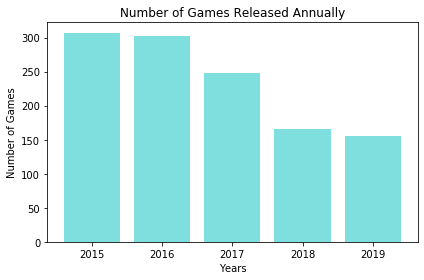

In [8]:
# Generate a bar plot for total released each year

plt.title("Number of Games Released Annually")
plt.xlabel("Years")
plt.ylabel("Number of Games")

ax1 = plt.bar(total.index, total, color='c', alpha=0.5, align="center")
plt.tight_layout()

plt.show()


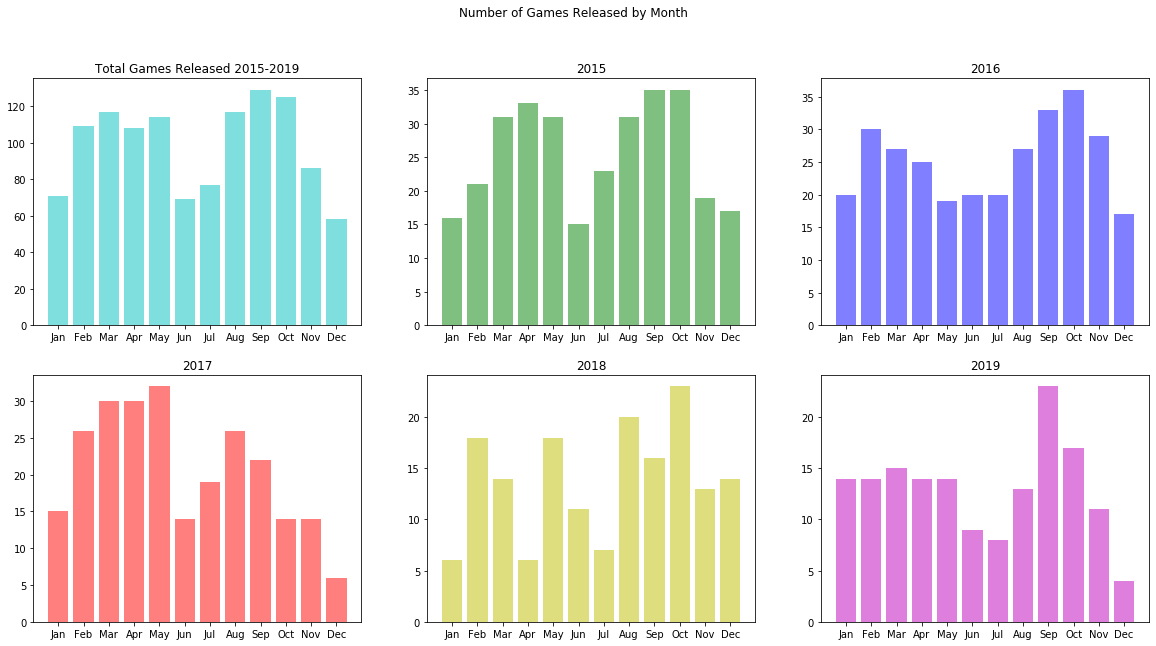

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (20,10))
fig.suptitle("Number of Games Released by Month")

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep","Oct","Nov","Dec"]

#plt.title("Number of Games Released by Month")

all_years = games_df.groupby(["month"])["game count"].count()
barplot0 = axes[0,0].bar(months, all_years, color='c', alpha=0.5)
axes[0,0].set_title('Total Games Released 2015-2019')

year1 = months_df[2015]
barplot1 = axes[0,1].bar(months, year1, color='g', alpha=0.5)
axes[0,1].set_title('2015')

year2 = months_df[2016]
barplot2 = axes[0,2].bar(months, year2, color='b', alpha=0.5)
axes[0,2].set_title('2016')

year3 = months_df[2017]
barplot3 = axes[1,0].bar(months, year3, color='r', alpha=0.5)
axes[1,0].set_title('2017')

year4 = months_df[2018]
barplot4 = axes[1,1].bar(months, year4, color='y', alpha=0.5)
axes[1,1].set_title('2018')

year5 = months_df[2019]
barplot5 = axes[1,2].bar(months, year5, color='m', alpha=0.5)
axes[1,2].set_title('2019')

plt.show()


<BarContainer object of 12 artists>

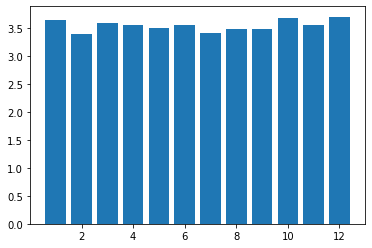

In [58]:
avg_rating = games_df.groupby(games_df["month"])["rating"].mean()
plt.bar(avg_rating.index, avg_rating)

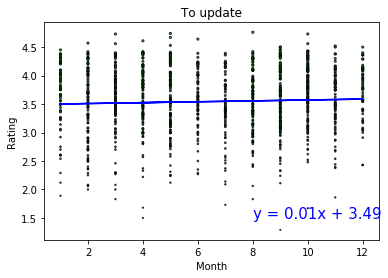

In [66]:
# 
dates = games_df["month"]
rating = games_df["rating"]

# Calculate the correlation coefficient and linear regression model 
(slope, intercept, rvalue, pvalue, stderr) = linregress(dates, rating)
regress_values = dates * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(dates,regress_values,"r-",color ="blue")

plt.annotate(line_eq,(8,1.5),fontsize=15,color="blue")
plt.scatter(dates, rating, marker="o", facecolors="green", edgecolors="black",
            s=rating, alpha=.75)

x_limit = dates * 1.1
y_limit = rating * 1.1


plt.xlabel("Month")
plt.ylabel("Rating")
plt.title("To update")
plt.show()


In [82]:
games_df["added"]

0       {'yet': 558, 'owned': 6109, 'beaten': 2395, 't...
1       {'yet': 462, 'owned': 6136, 'beaten': 1903, 't...
2       {'yet': 398, 'owned': 4197, 'beaten': 1253, 't...
3       {'yet': 314, 'owned': 4828, 'beaten': 1518, 't...
4       {'yet': 292, 'owned': 4821, 'beaten': 1229, 't...
                              ...                        
1175    {'yet': 4, 'owned': 2, 'beaten': 9, 'toplay': ...
1176    {'yet': 1, 'owned': 7, 'beaten': 10, 'toplay':...
1177    {'yet': 1, 'owned': 5, 'beaten': 3, 'dropped':...
1178    {'yet': 2, 'owned': 5, 'beaten': 7, 'toplay': ...
1179    {'yet': 2, 'owned': 4, 'beaten': 2, 'toplay': ...
Name: added, Length: 1180, dtype: object

In [98]:
users = games_df["added"].str.split(":", n=12, expand = True)
users

for i in range(1, len(users.columns)-1):

    if i == 1:
        user = users[i].str.split(",", n=2, expand = True)

    else:
        variable = users[i].str.split(",", n=1, expand = True)
        user = pd.merge(user, variable, left_index=True, right_index=True)
      
        
#user = user.drop(user.columns[[1,3,5,7,9]], axis = 1)
#user.columns = ["Yet", "Owned", "Beaten"] 
user.head()

,0_x,1_x,0_y,1_y,0_x,1_x,0_y,1_y,0,1
0,558,'owned',6109,'beaten',2395,'toplay',455,'dropped',421,'playing'
1,462,'owned',6136,'beaten',1903,'toplay',184,'dropped',339,'playing'
2,398,'owned',4197,'beaten',1253,'toplay',1140,'dropped',217,'playing'
3,314,'owned',4828,'beaten',1518,'toplay',319,'dropped',368,'playing'
4,292,'owned',4821,'beaten',1229,'toplay',225,'dropped',727,'playing'
